In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


In [2]:
train = pd.read_csv('~/aiffel/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# 훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [5]:
# 2. datetime 칼럼을 datetime 자료형으로 변환하고

pd.to_datetime(train['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 시, 분, 초까지 6가지 컬럼 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


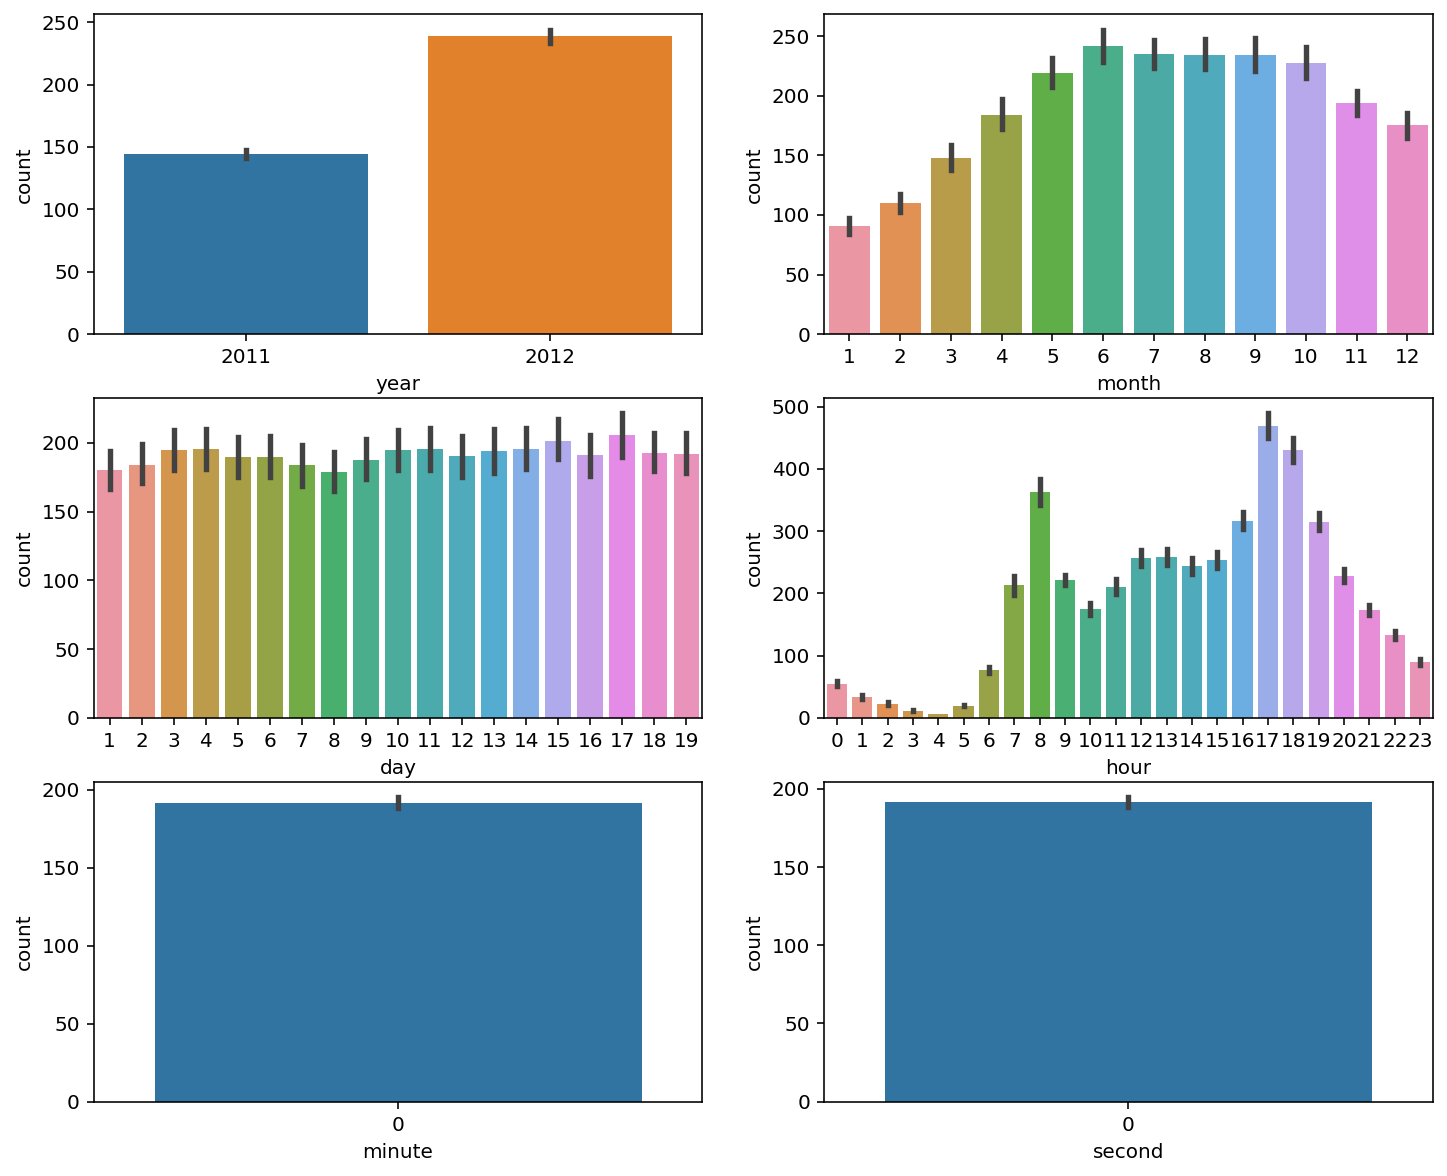

In [7]:
# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

fig = plt.figure(figsize=[12,10])

#year와 count
ax1 = fig.add_subplot(3,2,1)
sns.barplot(data=train, x='year', y='count')

#month와 count
ax2 = fig.add_subplot(3,2,2)
sns.barplot(data=train, x='month', y='count')

#day와 count
ax3 = fig.add_subplot(3,2,3)
sns.barplot(data=train, x='day', y='count')

#hour와 count
ax4 = fig.add_subplot(3,2,4)
sns.barplot(data=train, x='hour', y='count')

#minute와 count
ax5 = fig.add_subplot(3,2,5)
sns.barplot(data=train, x='minute', y='count')

#second와 count
ax6 = fig.add_subplot(3,2,6)
sns.barplot(data=train, x='second', y='count')

In [8]:
# 4. X, y 컬럼 선택 및 train/test 데이터 분리
# X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

print(train.columns)

X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'year', 'month', 'day', 'hour']].values
y = train[['count']].values

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 5. LinearRegression 모델 학습
# sklearn의 LinearRegression 모델 불러오기 및 학습하기

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산



predictions = model.predict(X_test)
predictions

array([[127.],
       [ 13.],
       [163.],
       ...,
       [509.],
       [  5.],
       [239.]])

In [12]:
# mse 값과 함께 rmse 값도 계산하기

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse =mean_squared_error(y_test, predictions, squared=False) 

print('mse = ', mse)
print('rmse = ', rmse)

mse =  2.6971886988678824e-25
rmse =  5.193446542391558e-13


In [13]:
# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

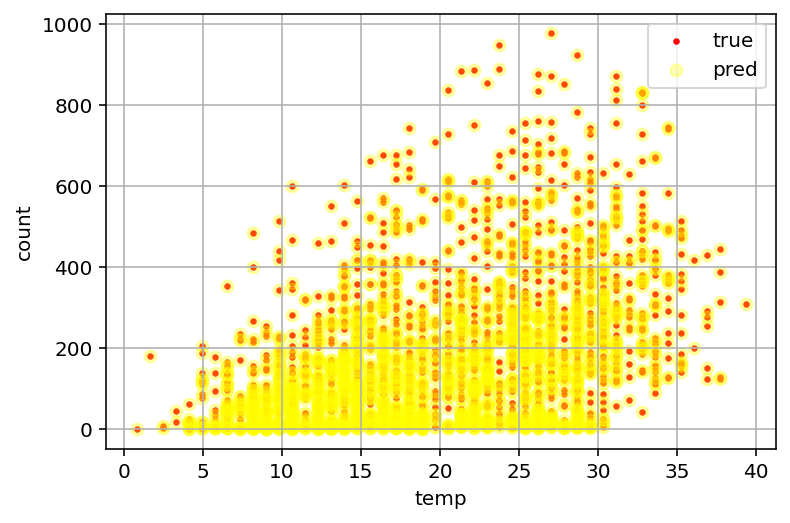

In [14]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 4], y_test, label="true", color = 'red', s = 5)
plt.scatter(X_test[:, 4], predictions, label="pred", color = 'yellow', alpha = 0.3)
plt.xlabel('temp')
plt.ylabel('count')
plt.grid()
plt.legend()
plt.show()

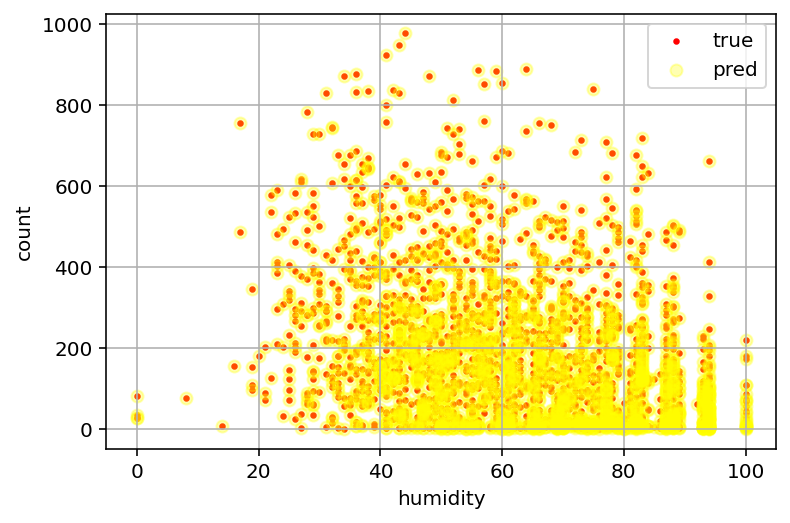

In [15]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 6], y_test, label="true", color = 'red', s = 5)
plt.scatter(X_test[:, 6], predictions, label="pred", color = 'yellow', alpha = 0.3)
plt.xlabel('humidity')
plt.ylabel('count')
plt.grid()
plt.legend()
plt.show()